# MELODIES-MONET example with MOPITT CO

First lets just import the driver

In [1]:
import sys
sys.path.append('../../')
from melodies_monet import driver

Please install h5netcdf to open files from the Amazon S3 servers.


### Driver class

First, we initialize the python driver analysis class. It consists of 3 main components/processes; 1. model instances, 2. observation instances, 3. a paired instance of both.  This helps us set up the comparisons.

In [2]:
an = driver.analysis()

### Control File

Read in all the comparison definitions from the yaml control file.

In [3]:
an.control = '../yaml/control_mopitt.yaml'
an.read_control()
#an.control_dict
#an.control_dict['obs']['mopitt_l3']

### Open Obs

Load all the data files. Satellites data is usually hdf or netCDF, although sometimes are saved as ascii or other unusual formats. Note the data needs to be already accessible on the system you are working on. Future functionality will include OpenDap. 

The Monetio MOPITT level 3 reader works on daily and monthly level 3 files because they have the same format.

In [4]:
an.open_obs()

Reading MOPITT
/ships19/aqda/mbruckner/Mopitt_mm_test/MOP03J-20190715-L3V5.9.3.he5
/ships19/aqda/mbruckner/Mopitt_mm_test/MOP03J-20190716-L3V5.9.3.he5
/ships19/aqda/mbruckner/Mopitt_mm_test/MOP03J-20190717-L3V5.9.3.he5
/ships19/aqda/mbruckner/Mopitt_mm_test/MOP03J-20190718-L3V5.9.3.he5
/ships19/aqda/mbruckner/Mopitt_mm_test/MOP03J-20190719-L3V5.9.3.he5


We can look at the data we just loaded based on the observation names defined in the yaml dictionary.

### Loading the model data

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames. Note it can open multiple files easily by including hot keys

In [5]:
an.open_models()

raqms
/ships19/aqda/mbruckner/monet_plots/mopitt_example_raqms/uwhyb*nc
changing units for ico


### Pair the data

Pairing of model data with MOPITT L3 data in Melodies Monet is a bilinear interpolation from the model grid to the MOPITT grid with the xesmf regridding tools. As of now, apply_ak must be set to True in the yaml. Pairing without the averaging kernel is not supported for this dataset at this time.

Pairing also only works when the model data is at the same or higher time resolution than the observation data. Eg, MOPITT is monthly while model is 6H.

MOPITT pairing utility also auto-applies a scaling factor to the paired model columns and observation columns so that the units are $10^{18}$ molec./$cm^{2}$. 

In [6]:
an.pair_data()

Aggregating model to observation timestep


/home/mbruckner/miniconda3/envs/develop_monet/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:641: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


### Generat;e Plots

Generate plots as defined in yaml

using satplots
-0.8399794070450788 0.8399794070450788
Reference std: 0.3959782


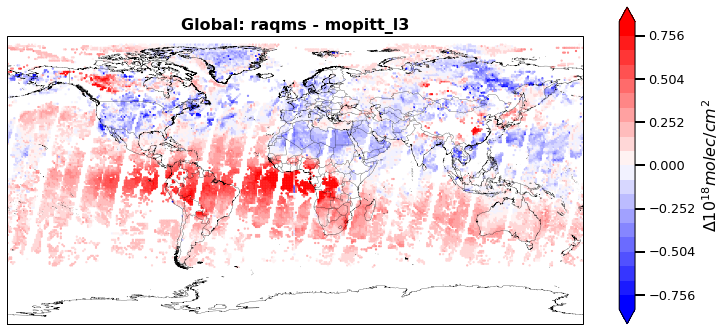

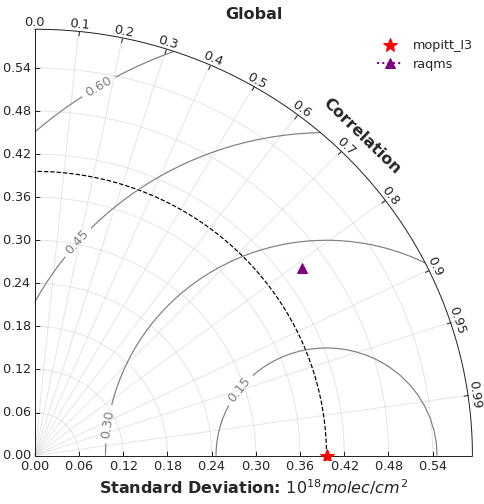

In [7]:
an.plotting()